In [1]:
from Pneumotracker_func import build_df
from Pneumotracker_stats_func import build_stats_df, compare_pops, chi_test
import math
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

orig_path, seg_path = r'.\chest_xray', r'.\segmentation'
orig_file_ext, seg_file_ext = 'jpeg', 'png'

In [2]:
print('Building dataset DataFrame')

df = build_df(path_orig = orig_path,
              orig_file_ext = orig_file_ext,
              path_seg = seg_path,
              seg_file_ext = seg_file_ext,
              save_path = r'.\Dfs\df_all.csv')

df.head()

Building dataset DataFrame
DataFrame was found, would you like to read it (R) or recreate it (C) (default Read)?



,Label_name,Label_int,Label_pathology,Label_pathology_int,Filename_orig,Filepath_orig,Filename_seg,Filepath_seg
0,PNEUMONIA,1,bacteria,1,person1947_bacteria_4876.jpeg,.\chest_xray\val\PNEUMONIA\person1947_bacteria...,person1947_bacteria_4876.png,.\segmentation\val\PNEUMONIA\person1947_bacter...
1,PNEUMONIA,1,bacteria,1,person1946_bacteria_4875.jpeg,.\chest_xray\val\PNEUMONIA\person1946_bacteria...,person1946_bacteria_4875.png,.\segmentation\val\PNEUMONIA\person1946_bacter...
2,PNEUMONIA,1,bacteria,1,person1952_bacteria_4883.jpeg,.\chest_xray\val\PNEUMONIA\person1952_bacteria...,person1952_bacteria_4883.png,.\segmentation\val\PNEUMONIA\person1952_bacter...
3,PNEUMONIA,1,bacteria,1,person1954_bacteria_4886.jpeg,.\chest_xray\val\PNEUMONIA\person1954_bacteria...,person1954_bacteria_4886.png,.\segmentation\val\PNEUMONIA\person1954_bacter...
4,PNEUMONIA,1,bacteria,1,person1951_bacteria_4882.jpeg,.\chest_xray\val\PNEUMONIA\person1951_bacteria...,person1951_bacteria_4882.png,.\segmentation\val\PNEUMONIA\person1951_bacter...


## I. Building DataFrame for statistics computation

In [3]:
print('Building dataset DataFrame')

df_stats = build_stats_df(df = df,
                          filepath_col = 'Filepath_orig',
                          labelname_col = 'Label_name',
                          labelpat_col = 'Label_pathology',
                          save_path = r'.\Dfs\df_stats.csv')

df_stats.head()

Building dataset DataFrame
DataFrame was found, would you like to read it (R) or recreate it (C) (default Read)?



,Pathology,Pathogen,Mean,Nb_pixels,Sup_thr_100,Per_thr_100,0,1,2,3,...,246,247,248,249,250,251,252,253,254,255
0,PNEUMONIA,bacteria,136.452473,764928,594148,0.776737,40901,1189,1168,1205,...,16.0,28.0,314.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PNEUMONIA,bacteria,98.546891,763264,413281,0.541465,19002,4183,3237,3739,...,622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PNEUMONIA,bacteria,143.098723,1134784,921588,0.812126,37653,7169,3962,2190,...,34.0,31.0,61.0,68.0,96.0,121.0,636.0,0.0,0.0,0.0
3,PNEUMONIA,bacteria,106.440616,1876992,1093371,0.582512,405851,8711,8702,6990,...,40.0,51.0,215.0,55.0,184.0,79.0,1123.0,0.0,0.0,0.0
4,PNEUMONIA,bacteria,140.819660,666496,530464,0.795900,2936,634,1434,1436,...,20.0,36.0,34.0,38.0,44.0,36.0,74.0,120.0,102.0,613.0


## II. Mean pixel intensity

''

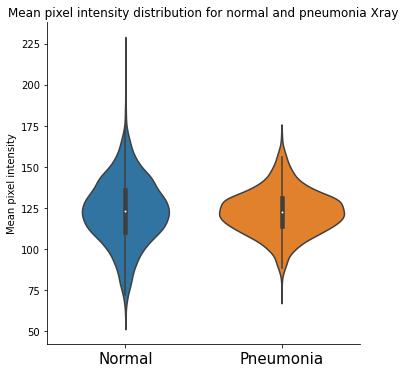

In [4]:
plot1 = sns.catplot(x = 'Pathology', y = 'Mean', data = df_stats.loc[:, ['Mean', 'Pathology']], kind = 'violin', showmeans = True, inner = 'box')
plot1.set_xticklabels(['Normal', 'Pneumonia'], fontsize=15)
plot1.set_xlabels('')
plot1.set_ylabels('Mean pixel intensity')
plt.title('Mean pixel intensity distribution for normal and pneumonia Xray')
;

In [5]:
compare_pops(np.array(df_stats[df_stats['Pathology'] == 'NORMAL']['Mean']),
             np.array(df_stats[df_stats['Pathology'] == 'PNEUMONIA']['Mean']),
             'Normal',
             'Pneumonia')

1. Are populations normally distributed?
H0 (normal distribution) rejected (p-value = 0.00421).
Dataset "Normal" distribution does not appear normal.

H0 (normal distribution) rejected (p-value = 0.00004).
Dataset "Pneumonia" distribution does not appear normal.

2. Do populations have similar distributions?
H0 (identical population distributions) not rejected (p-value = 0.16009).
Normal and Pneumonia populations appear to have similar distributions.



In [6]:
df_chi = df_stats.loc[:, ['Pathology'] + list(np.arange(0, 256, 1))].groupby('Pathology').sum()
chi_test(df_chi, 'Pathology', 'Pixel intensity', df_chi.sum().sum())

H0 (variables are independant) rejected (p-value = 0.00000).
Pathology and Pixel intensity variables appear to be independant.

Cramer's V value is 0.12:
There is a weak link between "Pathology" and "Pixel intensity".


## III. Pixel intensity threshold

''

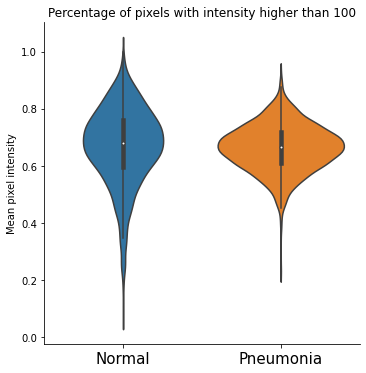

In [7]:
plot1 = sns.catplot(x = 'Pathology', y = 'Per_thr_100', data = df_stats.loc[:, ['Per_thr_100', 'Pathology']], kind = 'violin', showmeans = True, inner = 'box')
plot1.set_xticklabels(['Normal', 'Pneumonia'], fontsize=15)
plot1.set_xlabels('')
plot1.set_ylabels('Mean pixel intensity')
plt.title('Percentage of pixels with intensity higher than 100')
;

In [8]:
compare_pops(np.array(df_stats[df_stats['Pathology'] == 'NORMAL']['Per_thr_100']),
             np.array(df_stats[df_stats['Pathology'] == 'PNEUMONIA']['Per_thr_100']),
             'Normal',
             'Pneumonia')

1. Are populations normally distributed?
H0 (normal distribution) rejected (p-value = 0.00035).
Dataset "Normal" distribution does not appear normal.

H0 (normal distribution) rejected (p-value = 0.00000).
Dataset "Pneumonia" distribution does not appear normal.

2. Do populations have similar distributions?
H0 (identical population distributions) rejected (p-value = 0.00001).
Normal and Pneumonia populations appear to have different distributions.



In [9]:
df_chi = df_stats.loc[:, ['Pathology', 'Per_thr_100']]
df_chi['Per_thr_100'] = df_chi['Per_thr_100'].apply(lambda x: math.trunc(x * 100))
df_chi = pd.crosstab(df_chi['Pathology'], df_chi['Per_thr_100'])
chi_test(df_chi, 'Pathology', 'Percentage above 100', df_stats.shape[0])

H0 (variables are independant) rejected (p-value = 0.00000).
Pathology and Percentage above 100 variables appear to be independant.

Cramer's V value is 0.23:
There is a moderate link between "Pathology" and "Percentage above 100".


#### There is a weak link between mean pixel intensity of images and the presence/absence of Pneumonia in radiographies.

#### There is a moderate link between the percentage of pixel with intensity higher than 100 and the presence/absence of Pneumonia in radiography